In [66]:
from vae import VAE
from vae import get_device

import torch
import torchvision
import numpy as np

In [7]:
device = get_device()
net = VAE(latent=2).to(device)
net.load_state_dict(torch.load('vae.pth'))

<All keys matched successfully>

In [10]:
tf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=tf,
)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=8)

In [81]:
for images, labels in dataloader:
    break
images = images.to(device)
labels = labels.to(device)

In [82]:
net.eval()
with torch.no_grad():
    mean, logvar = net.encoder(images)
    z = net.sampling(mean, logvar)

In [84]:
print(mean.shape, logvar.shape, z.shape, labels.shape)

torch.Size([128, 2]) torch.Size([128, 2]) torch.Size([128, 2]) torch.Size([128])


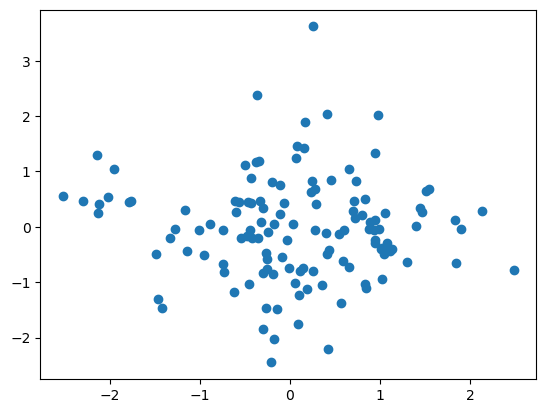

In [85]:
from matplotlib import pyplot as plt

zcpu = z.cpu()
plt.scatter(zcpu[:,0], zcpu[:,1])

In [102]:
text_encoder = torch.nn.Embedding(10, 2).to(device)

In [103]:
logit_scale = torch.nn.Parameter(torch.ones([]))

In [104]:
text_code = text_encoder(labels)
img_code = z

In [105]:
print(img_code.shape, text_code.shape)

torch.Size([128, 2]) torch.Size([128, 2])


In [90]:
m = logit_scale * img_code @ text_code.t()

In [91]:
print(m.shape)

torch.Size([128, 128])


In [94]:
target = torch.arange(128).to(device)

In [98]:
loss1 = torch.nn.CrossEntropyLoss()(m, target)
loss2 = torch.nn.CrossEntropyLoss()(m.t(), target)

In [100]:
loss = loss1 + loss2

In [101]:
loss

tensor(13.9465, device='mps:0', grad_fn=<AddBackward0>)

In [106]:
import multiprocessing
multiprocessing.cpu_count()

8

In [107]:
np.log(1 / 0.07)

2.659260036932778